In [1]:
# Run necessary imports

from problems import *
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
# Define problem 

class SocialNetworkProblem(Problem):
    friendsList = [None] * 4039

    def __init__(self, initial, goal=None):
        self.initial = initial
        self.goal = goal

        friendsFile = open("../data/friendsLists.txt")

        for line in friendsFile:
            list_tokens = line.split()
            list = []

            for token in list_tokens[1:]:
                list.append(token)

            self.friendsList[int(list_tokens[0])] = list

    def actions(self, state):
        return self.friendsList[int(state)]

    def transition(self, state, action):
        return action

    def path_cost(self, cost, state_from, state_to):
        return cost + 1

In [3]:
# Generate random connected tuples

tuples = []

fake_problem = SocialNetworkProblem(0,0)

for i in range(0,500):
    # steps = random.randint(2,3)
    start = str(random.randint(0,4038))
    end = str(random.randint(0,4038))
    # for j in range(0, steps):
        # possible_state = fake_problem.actions(end)
        # end = possible_state[random.randint(0, len(possible_state)-1)]
    tuples.append((start,end))

print(tuples)

[('1898', '245'), ('3097', '2884'), ('614', '1913'), ('687', '40'), ('1774', '139'), ('937', '2939'), ('1650', '3833'), ('2215', '926'), ('3243', '3328'), ('882', '3106'), ('999', '3253'), ('1383', '3351'), ('2920', '3484'), ('1724', '2068'), ('1788', '3189'), ('3855', '3334'), ('1563', '3700'), ('1549', '3369'), ('3104', '1122'), ('3015', '3315'), ('439', '1045'), ('3192', '52'), ('2140', '3131'), ('154', '1315'), ('1114', '513'), ('3521', '1307'), ('3437', '2930'), ('2756', '2500'), ('1200', '2891'), ('1515', '1116'), ('656', '407'), ('3026', '3268'), ('1573', '1253'), ('429', '677'), ('917', '2454'), ('2959', '1374'), ('3055', '3069'), ('659', '2669'), ('2180', '2398'), ('1662', '2789'), ('1494', '3458'), ('1247', '2192'), ('2213', '416'), ('2578', '1361'), ('3577', '3083'), ('2453', '1170'), ('2971', '1881'), ('2293', '550'), ('939', '622'), ('2553', '2372'), ('2545', '2649'), ('3678', '1445'), ('667', '2420'), ('2576', '1736'), ('1173', '205'), ('769', '1299'), ('1351', '1857'), (

Bidirectional BFS: 100%|██████████| 500/500 [08:19<00:00,  1.00it/s]


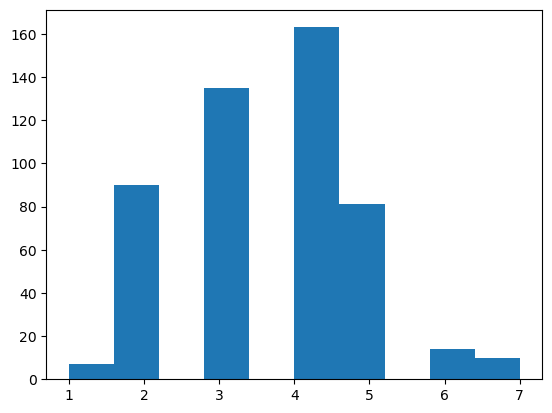

In [4]:
# Use BiBFS to find connectinos
lengths_bbfs = []

for tuple in tqdm(tuples, desc = "Bidirectional BFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = bidirectional_breadth_first_search(problem)
    lengths_bbfs.append(len(solution))

plt.hist(lengths_bbfs)
plt.show()

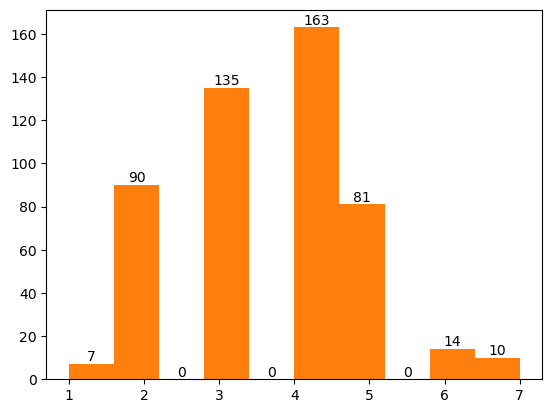

In [7]:
counts, edges, bars  = plt.hist(lengths_bbfs)
plt.bar_label(bars)
plt.show()
# print(lengths_bbfs)

In [ ]:
# Use BFS to find connections
lengths_bfs = []

for tuple in tqdm(tuples, desc = "Unidirectional BFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = breadth_first_search(problem)
    lengths_bfs.append(len(solution))

plt.hist(lengths_bfs)
plt.show()

In [ ]:
# Use DFS to find connections
lengths_dfs = []

for tuple in tqdm(tuples, desc = "DFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = depth_first_search(problem)
    lengths_dfs.append(len(solution))

plt.hist(lengths_dfs)
plt.show()

In [ ]:
# Use DLS w/ limit=6 to find connections
lengths_dls = []

for tuple in tqdm(tuples, desc = "DLS w/ limit=6"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = depth_limited_search(problem,6)
    lengths_dls.append(len(solution))

plt.hist(lengths_dls)
plt.show()

In [ ]:
# Use IDDFS to find connections
lengths_iddfs = []

for tuple in tqdm(tuples, desc = "IDDFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = iterative_deepening_search(problem)
    lengths_iddfs.append(len(solution))

plt.hist(lengths_iddfs)
plt.show()